# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from pprint import pprint
wind_speeds=[]
temperatures=[]
humidities=[]
cloudinesses=[]
latitudes=[]
longitudes=[]
city_list=[]
count=0
for each_city in cities[0:550]:
    city_name= each_city
    count= count+1
    base_url =f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}'
    print(f'Processing Record {count} | {city_name}')
    response= requests.get(base_url)
    data= response.json()
#        pprint(reponse.content)
    try:    
        wind_speed= data['wind']['speed']
        temperature= data['main']['temp']
        humidity= data['main']['humidity']
        cloudiness= data['clouds']['all']
        latitude= data['coord']['lat']
        longitude= data['coord']['lon']
        
    except:
        print(f'Error for {city_name}')
        next
    city_list.append(city_name)
    wind_speeds.append(wind_speed)
    temperatures.append(temperature)
    humidities.append(humidity)
    cloudinesses.append(cloudiness)
    latitudes.append(latitude)
    longitudes.append(longitude)

Processing Record 1 | alcaniz
Processing Record 2 | gigmoto
Processing Record 3 | illoqqortoormiut
Error for illoqqortoormiut
Processing Record 4 | ordzhonikidze
Processing Record 5 | mataura
Processing Record 6 | punta arenas
Processing Record 7 | ushuaia
Processing Record 8 | saint-philippe
Processing Record 9 | albany
Processing Record 10 | bingol
Processing Record 11 | hobart
Processing Record 12 | priargunsk
Processing Record 13 | yurginskoye
Processing Record 14 | pechora
Processing Record 15 | tessalit
Processing Record 16 | saint george
Processing Record 17 | pacific grove
Processing Record 18 | saleaula
Error for saleaula
Processing Record 19 | bathsheba
Processing Record 20 | dingle
Processing Record 21 | dikson
Processing Record 22 | cidreira
Processing Record 23 | thompson
Processing Record 24 | atuona
Processing Record 25 | menongue
Processing Record 26 | reconquista
Processing Record 27 | new norfolk
Processing Record 28 | cape town
Processing Record 29 | torbay
Processin

Processing Record 236 | yuzhno-yeniseyskiy
Error for yuzhno-yeniseyskiy
Processing Record 237 | burica
Error for burica
Processing Record 238 | klaksvik
Processing Record 239 | guerrero negro
Processing Record 240 | tigil
Processing Record 241 | micheweni
Processing Record 242 | fairbanks
Processing Record 243 | arrifes
Processing Record 244 | ilek
Processing Record 245 | touros
Processing Record 246 | qaanaaq
Processing Record 247 | amderma
Error for amderma
Processing Record 248 | north bend
Processing Record 249 | sur
Processing Record 250 | port macquarie
Processing Record 251 | grand river south east
Error for grand river south east
Processing Record 252 | mackay
Processing Record 253 | havelock
Processing Record 254 | ahipara
Processing Record 255 | bonavista
Processing Record 256 | karaton
Processing Record 257 | la ronge
Processing Record 258 | mehamn
Processing Record 259 | aykhal
Processing Record 260 | portsmouth
Processing Record 261 | savelugu
Processing Record 262 | puert

Processing Record 472 | gamba
Processing Record 473 | gurlan
Processing Record 474 | yagodnoye
Processing Record 475 | bam
Processing Record 476 | ust-maya
Processing Record 477 | manzil jamil
Error for manzil jamil
Processing Record 478 | sitka
Processing Record 479 | tarko-sale
Processing Record 480 | broome
Processing Record 481 | lubango
Processing Record 482 | oksfjord
Processing Record 483 | sonoita
Processing Record 484 | sukhothai
Processing Record 485 | seydi
Processing Record 486 | barreirinha
Processing Record 487 | cranbrook
Processing Record 488 | frederiksvaerk
Processing Record 489 | soure
Processing Record 490 | khonuu
Error for khonuu
Processing Record 491 | qax
Processing Record 492 | bani
Processing Record 493 | utrera
Processing Record 494 | ozgon
Error for ozgon
Processing Record 495 | little current
Processing Record 496 | huarmey
Processing Record 497 | richard toll
Error for richard toll
Processing Record 498 | tateyama
Processing Record 499 | manono
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_dict={
    'City':city_list,
    'Lat': latitudes,
    'Lng':longitudes,
    'Max Temp': temperatures,
    'Humidity': humidities,
    'Cloudiness':cloudinesses,
    'Wind Speed': wind_speeds
}

weather_df= pd.DataFrame(data_dict)

In [5]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,alcaniz,41.05,-0.13,288.97,68,99,4.47
1,gigmoto,13.78,124.39,302.63,72,75,2.88
2,illoqqortoormiut,13.78,124.39,302.63,72,75,2.88
3,ordzhonikidze,52.44,61.74,260.79,94,75,4.31
4,mataura,-46.19,168.86,288.71,80,55,8.49
...,...,...,...,...,...,...,...
545,svetlyy,54.67,20.13,281.51,87,83,5.00
546,romodanovo,54.43,45.33,266.98,84,13,3.20
547,marinette,45.10,-87.63,274.88,69,90,7.20
548,akyab,20.15,92.90,300.27,64,3,2.24


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
# humidity_error_filter_df= weather_df['Humidity']>100 

# if weather_df['Humidity']>100
#     humidity_error_check_df= weather_df[humitiy_error_filter_df]

# else:
#     print(f'There are no humidity errors')

SyntaxError: invalid syntax (<ipython-input-34-37aa58e9c228>, line 3)

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

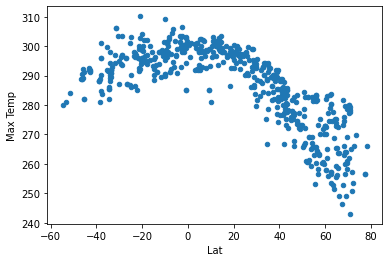

In [7]:
weather_df.plot(kind='scatter', x='Lat', y='Max Temp')

## Latitude vs. Humidity Plot

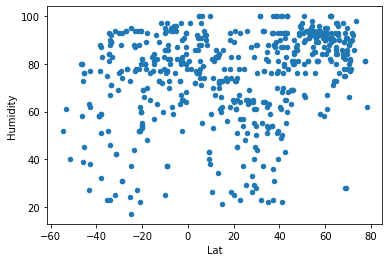

In [8]:
weather_df.plot(kind='scatter', x='Lat', y='Humidity')

## Latitude vs. Cloudiness Plot

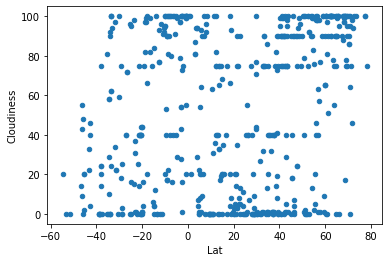

In [9]:
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness')

## Latitude vs. Wind Speed Plot

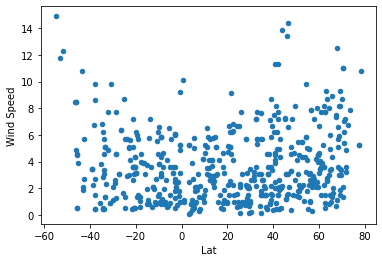

In [10]:
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed')

## Linear Regression

The r-squared is: 0.4895006273587039


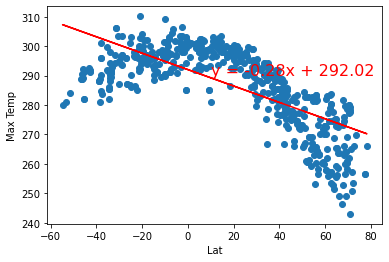

In [21]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,285),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7336861776437834


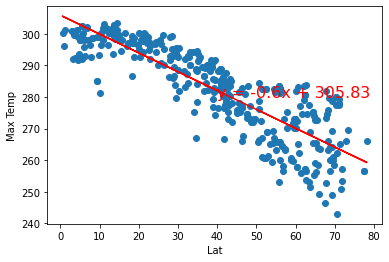

In [37]:
n_hemisphere_filter_df= weather_df['Lat']>0
n_hemispher_df= weather_df[n_hemisphere_filter_df]
n_hemispher_df

x_values = n_hemispher_df['Lat']
y_values = n_hemispher_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,280),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3041915003155792


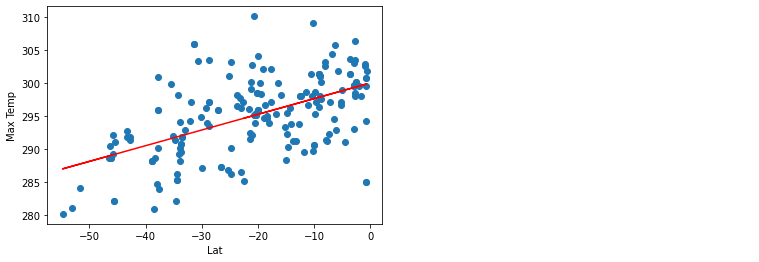

In [38]:
s_hemisphere_filter_df= weather_df['Lat']<0
s_hemispher_df= weather_df[s_hemisphere_filter_df]
s_hemispher_df

x_values = s_hemispher_df['Lat']
y_values = s_hemispher_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,280),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0859434689236467


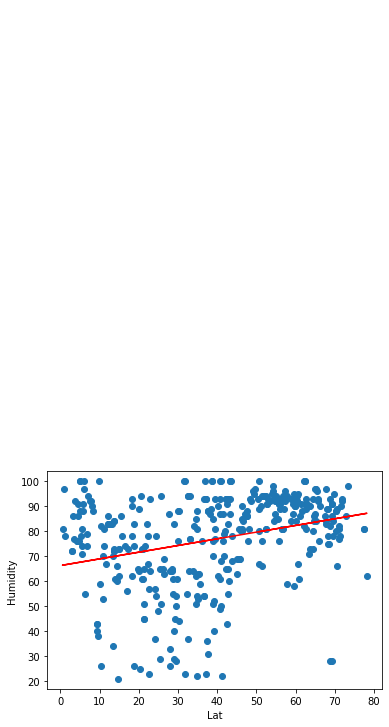

In [39]:
n_hemisphere_filter_df= weather_df['Lat']>0
n_hemispher_df= weather_df[n_hemisphere_filter_df]
n_hemispher_df

x_values = n_hemispher_df['Lat']
y_values = n_hemispher_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,285),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
s_hemisphere_filter_df= weather_df['Lat']<0
s_hemispher_df= weather_df[s_hemisphere_filter_df]
s_hemispher_df

x_values = s_hemispher_df['Lat']
y_values = s_hemispher_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,285),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
n_hemisphere_filter_df= weather_df['Lat']>0
n_hemispher_df= weather_df[n_hemisphere_filter_df]
n_hemispher_df

x_values = n_hemispher_df['Lat']
y_values = n_hemispher_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,285),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
s_hemisphere_filter_df= weather_df['Lat']0
s_hemispher_df= weather_df[s_hemisphere_filter_df]
s_hemispher_df

x_values = s_hemispher_df['Lat']
y_values = s_hemispher_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,285),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
n_hemisphere_filter_df= weather_df['Lat']>0
n_hemispher_df= weather_df[n_hemisphere_filter_df]
n_hemispher_df

x_values = n_hemispher_df['Lat']
y_values = n_hemispher_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,285),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
s_hemisphere_filter_df= weather_df['Lat']<0
s_hemispher_df= weather_df[s_hemisphere_filter_df]
s_hemispher_df

x_values = s_hemispher_df['Lat']
y_values = s_hemispher_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,285),fontsize=16,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()